In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
from src.ds import Dataset

ds = Dataset(false_color=True, t=[4])

len(ds)

20529

In [83]:
image, mask, mask0 = ds[0]

image.shape, image.dtype, image.max(), image.min(), mask.shape, mask.dtype, mask.max(), mask.min()

(torch.Size([256, 256, 1, 3]),
 torch.float32,
 tensor(0.9471),
 tensor(0.),
 torch.Size([256, 256]),
 torch.int32,
 tensor(0, dtype=torch.int32),
 tensor(0, dtype=torch.int32))

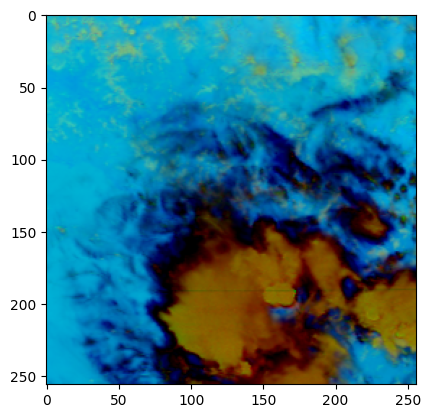

In [84]:
import matplotlib.pyplot as plt

plt.imshow(image[...,0,:])

In [85]:
import os 
import pandas as pd
path = '/fastdata/ashcolor/'
train = pd.read_csv(os.path.join(path, 'train_df.csv'))

train

,record_id,train
0,1284412112608546821,train
1,7457695218848685981,train
2,836236084461732921,train
3,7829917977180135058,train
4,5319255125658459358,train
...,...,...
20524,8443915190215904823,train
20525,8495643844280686935,train
20526,856381910009426679,train
20527,3751790308836191485,train


In [86]:
records = train.record_id.apply(str)
records = sorted(records)

In [87]:
import numpy as np 

img = np.load(os.path.join(path, 'contrails', records[0]) + '.npy')

img.shape, img.dtype, img.max(), img.min()

((256, 256, 4), dtype('float16'), 0.9473, 0.0)

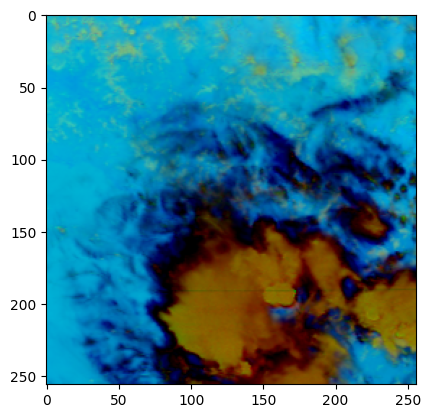

In [88]:
plt.imshow(img[...,:3].astype(float))

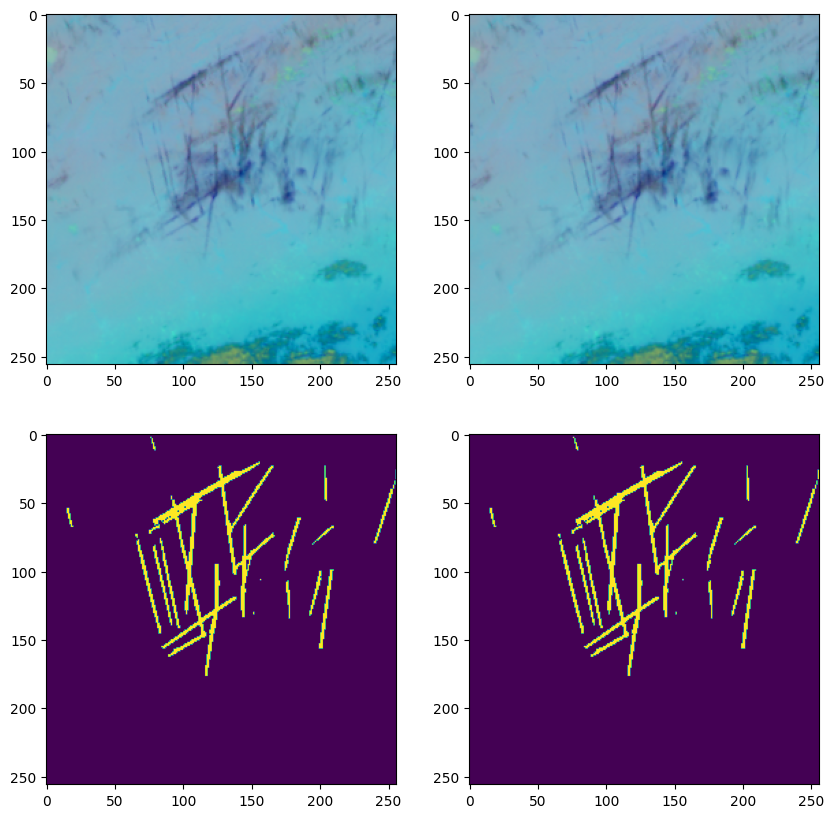

In [89]:
import random 

ix = random.randint(0, len(ds)-1)

img1, mask, _ = ds[ix]
img2 = records[ix]

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.imshow(img1[...,0,:])
ax2 = fig.add_subplot(222)
data = np.load(os.path.join(path, 'contrails', img2) + '.npy').astype(float)
ax2.imshow(data[...,:3])
ax3 = fig.add_subplot(223)
ax3.imshow(mask)
ax4 = fig.add_subplot(224)
ax4.imshow(data[...,3])
plt.show()


In [90]:
data[...,:3]

array([[[0.54003906, 0.64306641, 0.71435547],
        [0.53808594, 0.64453125, 0.71630859],
        [0.53955078, 0.64599609, 0.71679688],
        ...,
        [0.47509766, 0.59960938, 0.68994141],
        [0.48876953, 0.62548828, 0.71386719],
        [0.49609375, 0.64453125, 0.73095703]],

       [[0.53710938, 0.64501953, 0.71533203],
        [0.53466797, 0.64746094, 0.71582031],
        [0.53759766, 0.64794922, 0.71630859],
        ...,
        [0.48779297, 0.61914062, 0.70898438],
        [0.49121094, 0.63476562, 0.72167969],
        [0.49291992, 0.64404297, 0.73339844]],

       [[0.53662109, 0.64355469, 0.71484375],
        [0.52929688, 0.64941406, 0.71484375],
        [0.53662109, 0.64599609, 0.71435547],
        ...,
        [0.4987793 , 0.63134766, 0.72119141],
        [0.49584961, 0.64160156, 0.72607422],
        [0.4921875 , 0.64892578, 0.73681641]],

       ...,

       [[0.34692383, 0.75830078, 0.796875  ],
        [0.34985352, 0.76708984, 0.79785156],
        [0.34985352, 0

In [91]:
img1[...,0,:]

tensor([[[0.5399, 0.6430, 0.7144],
         [0.5380, 0.6447, 0.7161],
         [0.5394, 0.6462, 0.7170],
         ...,
         [0.4750, 0.5996, 0.6900],
         [0.4887, 0.6253, 0.7139],
         [0.4960, 0.6444, 0.7309]],

        [[0.5373, 0.6453, 0.7155],
         [0.5348, 0.6476, 0.7160],
         [0.5376, 0.6479, 0.7163],
         ...,
         [0.4878, 0.6191, 0.7089],
         [0.4912, 0.6345, 0.7214],
         [0.4929, 0.6440, 0.7334]],

        [[0.5365, 0.6437, 0.7149],
         [0.5294, 0.6496, 0.7146],
         [0.5368, 0.6460, 0.7143],
         ...,
         [0.4988, 0.6314, 0.7214],
         [0.4959, 0.6416, 0.7261],
         [0.4922, 0.6487, 0.7367]],

        ...,

        [[0.3469, 0.7584, 0.7968],
         [0.3498, 0.7672, 0.7978],
         [0.3500, 0.7713, 0.7958],
         ...,
         [0.0603, 0.6240, 0.7661],
         [0.0722, 0.6412, 0.7689],
         [0.0378, 0.6095, 0.7371]],

        [[0.3491, 0.7596, 0.7949],
         [0.3520, 0.7742, 0.7960],
         [0.

In [92]:
np.allclose(img1[...,0,:], data[...,:3]) # ash color está guardado en float16, de ahí la dif pero da igual pq en submission lo tengo igual

False

In [93]:
np.allclose(mask, data[...,3])

True